In [14]:
import pandas as pd

In [3]:
def extract_summary(file_path="data_input/data.csv", id=['936','1178']):
  """   
  Extract all relevant information, containing 6 variables
  start_date, end_date, total_spent, total_conversion, cpc_1, cpc_2
  """
  fb = pd.read_csv(file_path)
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Make sure to passed in appropriate preprocessing before extracting the start and end date
  campaigns['reporting_start'] = ___
  start_date = ___.min().strftime(format="%d %b %Y")
  end_date = ___.max().strftime(format="%d %b %Y")

  total_spent = int(___.sum())
  total_conversion = int(___.sum())

  # Create a cost per conversion dictionary per campaign
  # Cost per conversion is spent divided by total conversion
  cpc = campaigns.groupby(['campaign_id'])[[___, ___]].sum()
  cpc['CPC'] = cpc[___]/cpc[___]
  cpc_each = dict()
  for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

  return {
    "start_date": start_date,
    "end_date": end_date,
    "total_spent": total_spent,
    "total_conversion": total_conversion,
    "cpc": cpc_each

SyntaxError: unexpected EOF while parsing (<ipython-input-3-86327a436c43>, line 31)

In [21]:
file_path="data_input/data.csv"
id=['936','1178']

In [17]:
fb = pd.read_csv(file_path)
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

campaigns.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,25/08/2017,25/08/2017,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,26/08/2017,26/08/2017,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0
60,734290,26/08/2017,26/08/2017,936,108668,30-34,M,29,32,35,5374.0,1,1.04,4.0,0.0
63,734352,27/08/2017,27/08/2017,936,108678,35-39,M,10,11,16,4423.0,1,1.46,1.0,1.0
64,734361,29/08/2017,29/08/2017,936,108680,35-39,M,16,19,19,12382.0,2,2.84,1.0,1.0


In [23]:
campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'])
start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

In [24]:
total_spent = int(campaigns['spent'].sum())
total_conversion = int(campaigns['total_conversion'].sum())

In [25]:
cpc = campaigns.groupby(['campaign_id'])[['spent', 'total_conversion']].sum()
cpc['CPC'] = cpc['spent']/cpc['total_conversion']
cpc_each = dict()
for each in id:
  cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

In [26]:
cpc_each
cpc_each[each]

15.91

In [ ]:
PERSON_NAME=name,
    START_DATE=data_dict[18 Aug 2017],
    END_DATE=data_dict[30 Aug 2017],
    TOTAL_SPENT="{:,}".format(data_dict[19470]),
    TOTAL_CONVERSION="{:,}".format(data_dict[1398]),
    CPC=unroll_sentence(data_dict['cpc']),
    GITHUB_LINK='https://github.com/tiaradwiputri/fire-capstone'
  )
  return composed

In [40]:
def extract_summary(file_path="data_input/data.csv", id=['936','1178']):
  """   
  Extract all relevant information, containing 6 variables
  start_date, end_date, total_spent, total_conversion, cpc_1, cpc_2
  """
  fb = pd.read_csv(file_path)
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Make sure to passed in appropriate preprocessing before extracting the start and end date
  campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'])
  start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
  end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

  total_spent = int(campaigns['spent'].sum())
  total_conversion = int(campaigns['total_conversion'].sum())

  # Create a cost per conversion dictionary per campaign
  # Cost per conversion is spent divided by total conversion
  cpc = campaigns.groupby(['campaign_id'])[['spent', 'total_conversion']].sum()
  cpc['CPC'] = cpc['spent']/cpc['total_conversion']
  cpc_each = dict()
  for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

  return {
    "start_date": start_date,
    "end_date": end_date,
    "total_spent": total_spent,
    "total_conversion": total_conversion,
    "cpc": cpc_each
  }

In [43]:
data_dict = extract_summary()

In [44]:
data_dict

{'start_date': '18 Aug 2017',
 'end_date': '30 Aug 2017',
 'total_spent': 19470,
 'total_conversion': 1398,
 'cpc': {'936': 8.13, '1178': 15.91}}

In [ ]:
def compose_email(template, name, data_dict):
  """   
  Compose email from template and data, attaching name on the message
  """
  composed = template.substitute(
    PERSON_NAME=name,
    START_DATE=data_dict["start_date"],
    END_DATE=data_dict["end_date"],
    TOTAL_SPENT="{:,}".format(data_dict["total_spent"]),
    TOTAL_CONVERSION="{:,}".format(data_dict["total_conversion"]),
    CPC=unroll_sentence(data_dict['cpc']),
    GITHUB_LINK='https://github.com/tiaradwiputri/fire-capstone'
  )
  return composed


In [7]:
import os
os.environ['EMAIL_ADDRESS']

'wilmos.pakpahan@gmail.com'

In [8]:
os.environ['EMAIL_PASSWORD']

'12345'

In [11]:
import smtplib

In [12]:
EMAIL = os.environ['EMAIL_ADDRESS']
PASSWORD = os.environ['EMAIL_PASSWORD']
 
s = smtplib.SMTP("smtp.gmail.com",587)
s.starttls() #Puts connection to SMTP server in TLS mode
s.login(EMAIL, PASSWORD)

msg = "\nsent with python for testing purpose"
s.sendmail(from_addr=EMAIL,to_addrs="wilmos.pakpahan@gmail.com", msg=msg)

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials x62sm2043110pfc.46 - gsmtp')

In [22]:
fb = pd.read_csv(file_path, parse_dates=[1,2])
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]
campaigns.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,2017-08-25,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,2017-08-26,2017-08-26,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0
60,734290,2017-08-26,2017-08-26,936,108668,30-34,M,29,32,35,5374.0,1,1.04,4.0,0.0
63,734352,2017-08-27,2017-08-27,936,108678,35-39,M,10,11,16,4423.0,1,1.46,1.0,1.0
64,734361,2017-08-29,2017-08-29,936,108680,35-39,M,16,19,19,12382.0,2,2.84,1.0,1.0


In [32]:
grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()
grouped

,campaign_id,age,reporting_start,total_conversion
0,1178,30-34,2017-08-19,33.0
1,1178,30-34,2017-08-20,38.0
2,1178,30-34,2017-08-21,24.0
3,1178,30-34,2017-08-22,56.0
4,1178,30-34,2017-08-23,135.0
...,...,...,...,...
74,936,45-49,2017-08-26,17.0
75,936,45-49,2017-08-27,2.0
76,936,45-49,2017-08-28,1.0
77,936,45-49,2017-08-29,2.0


In [35]:
import matplotlib.pyplot as plt

In [36]:
fig = plt.figure(1, figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

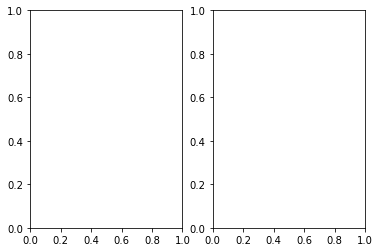

In [37]:
for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)

In [40]:
df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
df['reporting_start'] = df['reporting_start'].dt.date
pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
pivot

age,30-34,35-39,40-44,45-49
reporting_start,,,,
2017-08-18,11.0,10.0,2.0,16.0
2017-08-19,15.0,10.0,15.0,3.0
2017-08-20,13.0,10.0,2.0,10.0
2017-08-21,8.0,5.0,6.0,21.0
2017-08-22,19.0,3.0,6.0,10.0
2017-08-23,14.0,5.0,9.0,10.0
2017-08-24,13.0,4.0,1.0,5.0
2017-08-25,8.0,1.0,5.0,6.0
2017-08-26,5.0,0.0,4.0,17.0


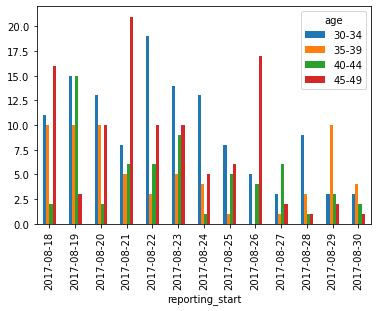

In [41]:
pivot.plot.bar(ax=plt.gca())

In [52]:
fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
fig.autofmt_xdate()

In [44]:
imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
fig.savefig(barchartwilly)

NameError: name 'date' is not defined

In [58]:
def create_plot(file_path="data_input/data.csv", id=['936', '1178']):
  """   
  Fetch data from data source and export as plot
  """
  fb = pd.read_csv(file_path, parse_dates=[1,2])
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Create a grouped dataframe based on campaign id, age group, and reporting date
  # Calculate the total converision of each group
  grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()

  fig = plt.figure(1, figsize=(15,6))

  # Iterate to create 1 plot campaign at a time
  for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca())

  fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
  fig.autofmt_xdate()

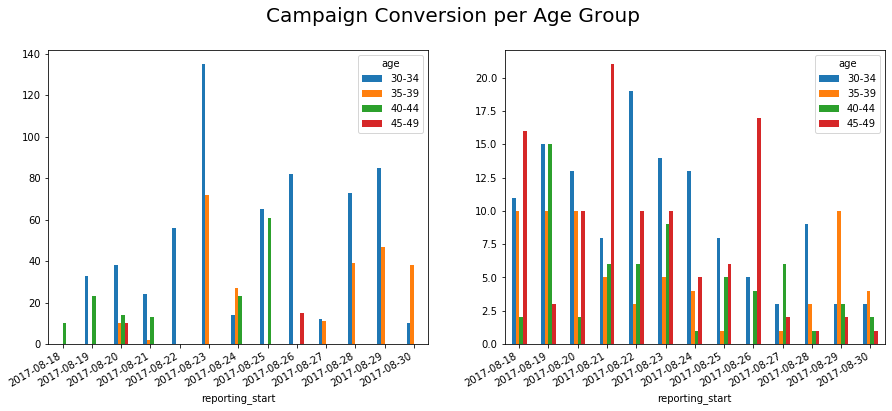

In [59]:
create_plot()